# Brezita

A captcha Resolver by Kunal Kumar Jha and Y. Rajeev Krishna

## Steps Involved 

1. Data collection
2. Data cleaning
3. Data exploration
4. Data Preprocessing
5. Spliting the train-test model
6. Training a CNN Model
7. Validation

We are connection the drive to google colab

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = './drive/My Drive/Dataset/captcha_ds'

Importing all the useful packages

In [ ]:
import cv2
import pandas
import seaborn
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

# 4. Data pre-processing

- Firstly, we have added `adpativeThreshold()` filter this extracts the features from the background. 
- Then we used `morphologyEx()` filter for eroding and dilating all the input images.
- Then we added an additional `dilate()` filter to dilate the image
- Finally, we added `GaussianBlur` to remove any addition noise

In [ ]:
def manupulate_img(img):
  img = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 145, 0)
  img = cv2.morphologyEx(img, cv2.MORPH_CLOSE, np.ones((4,2), np.uint8))
  img = cv2.dilate(img, np.ones((2,2), np.uint8), iterations = 1)
  img = cv2.GaussianBlur(img, (1,1), 0)
  return img

In [ ]:
import os
from PIL import Image
from keras.preprocessing.image import img_to_array, ImageDataGenerator

# 1. Data Collection

The data was collected from the Kaggle dataset repository.

# 2. Data Cleaning

The data was already cleaned so we didnt need to do anything to the data already existed

This `create_dataset()` will load all the images form the directory and load the images as a array in grayscale format. We have extracted the 5 characters images from all the images.

In [ ]:
def create_dataset():
  X = []
  y = []

  for image in os.listdir(path) :
      
      if image[6:] != 'png' :
          continue
      
      img = cv2.imread(os.path.join(path, image), cv2.IMREAD_GRAYSCALE)
      
      img = manupulate_img(img)
      image_list = [img[10:50, 30:50], img[10:50, 50:70], img[10:50, 70:90], img[10:50, 90:110], img[10:50, 110:130]]
      for i in range(5) :
          X.append(img_to_array(Image.fromarray(image_list[i])))
          y.append(image[i])
  X = np.array(X)
  y = np.array(y)

  return X,y

In [ ]:
import os

d = {}

for image in os.listdir(path):
  for i in range(0,5):
    if image[i] not in d:
      d[image[i]] = 1
    else:
      d[image[i]]+=1

print(d)
print(len(d))
d = {k: v for k, v in sorted(d.items(), key=lambda item: item[1])}


{'3': 271, '7': 262, 'x': 271, '2': 270, 'w': 244, 'c': 276, '8': 272, 'p': 259, '6': 267, 'n': 540, '4': 289, 'b': 247, 'm': 283, '5': 288, 'f': 277, 'd': 270, 'y': 240, 'e': 246, 'g': 281, 'o': 1, 'l': 1}
21


1071.0


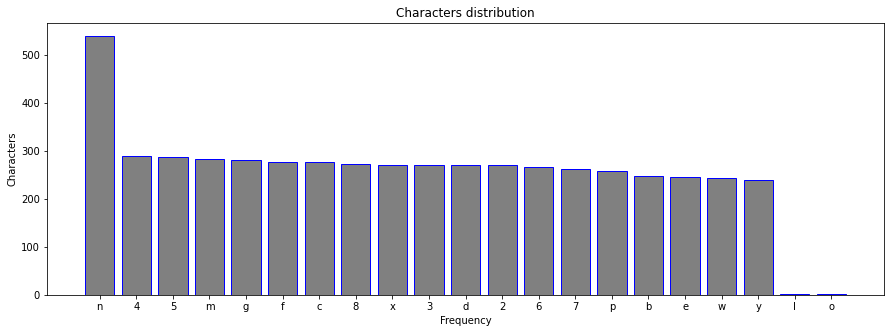

In [ ]:
chars = list(d.keys())
freq = list(d.values())

chars.reverse()
freq.reverse()
  
print(sum(freq)/5)
fig = plt.figure(figsize = (15, 5))
 
# creating the bar plot


import matplotlib.pyplot as plt

plt.bar(chars, freq, edgecolor='blue', color='grey')
# plt.barh(chars, freq)
 
plt.xlabel("Frequency")
plt.ylabel("Characters")
plt.title("Characters distribution")
plt.show()

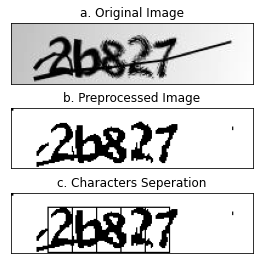

In [ ]:
img = cv2.imread(os.path.join(path, "2b827.png"), cv2.IMREAD_GRAYSCALE)

th1 = manupulate_img(img)
th2 = manupulate_img(img)
cv2.rectangle(th2, (30, 12), (50, 49), 0, 1)
cv2.rectangle(th2, (50, 12), (70, 49), 0, 1)
cv2.rectangle(th2, (70, 12), (90, 49), 0, 1)
cv2.rectangle(th2, (90, 12), (110, 49), 0, 1)
cv2.rectangle(th2, (110, 12), (130, 49), 0, 1)



titles = ['a. Original Image', 'b. Preprocessed Image', 'c. Characters Seperation']
images = [img, th1,th2]
for i in range(len(images)):    
  plt.subplot(3,1,i+1),plt.imshow(images[i],'gray')
  plt.title(titles[i])
  plt.xticks([]),plt.yticks([])
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
plt.show()

In [ ]:
X,y = create_dataset()

In [ ]:
print(X.shape)
print(y.shape)

(5200, 40, 20, 1)
(5200,)


In [ ]:
X /= 255.0

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

y_combine = LabelEncoder().fit_transform(y)
y_one_hot = OneHotEncoder(sparse = False).fit_transform(y_combine.reshape(len(y_combine),1))

In [ ]:
print(X.shape)
print(y_one_hot.shape)  # one hot encoded form

(5200, 40, 20, 1)
(5200, 19)


# 5. Train Test split

The dataset contains 1040 images and all the images are cropped in 5 image so total image were 5200 images to train.

Training data contained: 4160 images
Testing data contained: 1040 images

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size = 0.2, random_state = 1)

### Import CNN Layers

We have used keras CNN network to train our classification neural network.

In [ ]:
from keras.models import Sequential 
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import Flatten
from keras.layers import MaxPooling2D
from keras.layers import BatchNormalization
from keras.layers import Dropout
from keras.layers import Reshape
from keras.layers import LSTM
from keras.layers import Input


from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, Reshape, LSTM
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

In [ ]:
print(X_train.shape)
print(y_train.shape)

(4160, 40, 20, 1)
(4160, 19)


In [ ]:
print(X_test.shape)
print(y_test.shape)

(1040, 40, 20, 1)
(1040, 19)


In [ ]:
X_train = np.reshape(X_train, (4160, 40*20*1))

In [ ]:
from imblearn.over_sampling import SMOTE
X_train, y_train = SMOTE(sampling_strategy = 'auto', random_state = 1).fit_resample(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

In [ ]:
print(X_train.shape)
print(y_train.shape)


(7866, 800)
(7866, 19)


In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], 40, 20, 1))

In [ ]:
def create_model_1():

  model = Sequential()                                                          #we have used the sequential neural network
  model.add(Input((40, 20, 1,)))
  
  '''----------LAYER1--------'''
  model.add(Conv2D(32, (3,3), padding = 'same', activation = 'relu'))           # Conv2D network
  model.add(BatchNormalization())
  model.add(Dropout(0.2))
  model.add(MaxPooling2D(pool_size = (2,2), padding = 'same'))

  '''----------LAYER2-------'''
  model.add(Conv2D(16, (3,3), padding = 'same', activation = 'relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.2))
  model.add(MaxPooling2D(pool_size = (2,2), padding = 'same'))

  '''----------LAYER3--------'''
  model.add(Flatten())
  model.add(Dense(32, activation = 'relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.2))

  '''----------LAYER4--------'''
  model.add(Dense(32, activation = 'relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.2))

  '''----------LAYER5--------'''
  model.add(Dense(19, activation = 'softmax'))
  model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

  return model

In [ ]:
# model = cnn(128, 32, 16, 32, 32)
model = create_model_1()
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 40, 20, 32)        320       
                                                                 
 batch_normalization_19 (Bat  (None, 40, 20, 32)       128       
 chNormalization)                                                
                                                                 
 dropout_19 (Dropout)        (None, 40, 20, 32)        0         
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 20, 10, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 20, 10, 16)        4624      
                                                                 
 batch_normalization_20 (Bat  (None, 20, 10, 16)      

In [ ]:
from keras.callbacks import ModelCheckpoint
checkp = ModelCheckpoint('./result_model.h5', monitor = 'val_loss', verbose = 1, save_best_only = True)

In [ ]:
print(X_train.shape)
print(y_train.shape)

(7866, 40, 20, 1)
(7866, 19)


In [ ]:
epochs = 100
batch_size = 32

In [ ]:
traingen = ImageDataGenerator(rotation_range = 5, width_shift_range = [-2,2])
history = model.fit(
    traingen.flow(X_train, y_train, batch_size = batch_size), 
    validation_data = (X_test, y_test), 
    epochs = epochs, 
    steps_per_epoch = len(X_train)/batch_size, 
    callbacks = [checkp]
  )

Epoch 1/100
244/245 [============================>.] - ETA: 0s - loss: 2.2429 - accuracy: 0.3461
Epoch 00001: val_loss improved from inf to 3.57371, saving model to ./result_model.h5
245/245 [==============================] - 7s 22ms/step - loss: 2.2382 - accuracy: 0.3478 - val_loss: 3.5737 - val_accuracy: 0.0981
Epoch 2/100
244/245 [============================>.] - ETA: 0s - loss: 1.3345 - accuracy: 0.6309
Epoch 00002: val_loss improved from 3.57371 to 1.23549, saving model to ./result_model.h5
245/245 [==============================] - 5s 21ms/step - loss: 1.3329 - accuracy: 0.6317 - val_loss: 1.2355 - val_accuracy: 0.7000
Epoch 3/100
244/245 [============================>.] - ETA: 0s - loss: 0.9626 - accuracy: 0.7284
Epoch 00003: val_loss improved from 1.23549 to 0.80678, saving model to ./result_model.h5
245/245 [==============================] - 5s 21ms/step - loss: 0.9612 - accuracy: 0.7290 - val_loss: 0.8068 - val_accuracy: 0.7587
Epoch 4/100
245/245 [==========================

Text(0.5, 1.0, 'Model accuracy wrt Epoch')

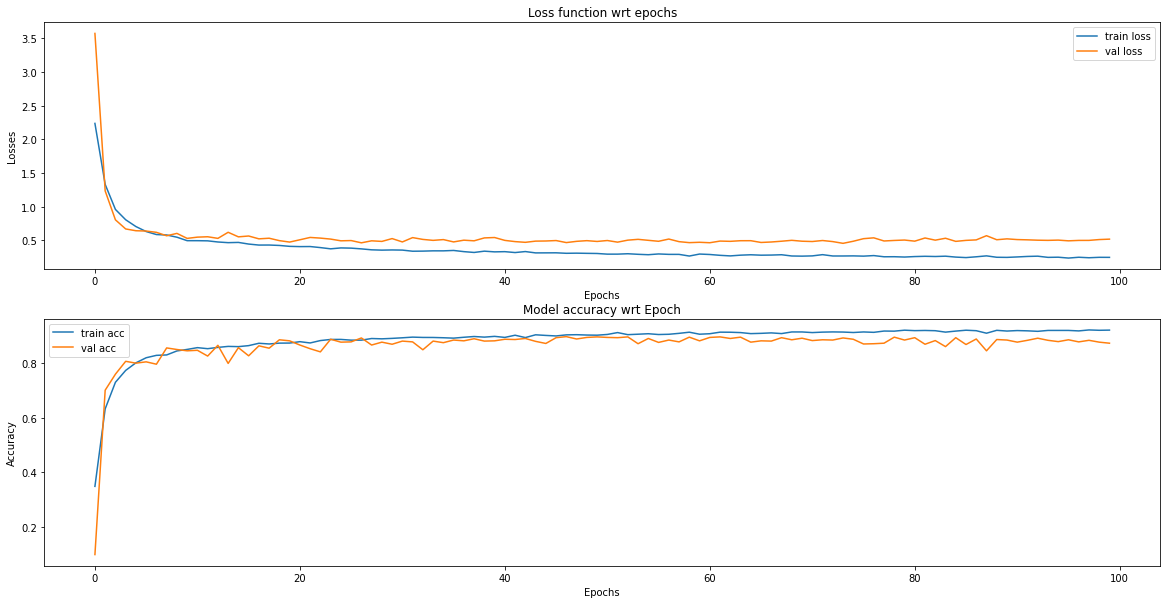

In [ ]:
plt.figure(figsize = (20,10))
plt.subplot(2,1,1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Losses')
plt.legend(['train loss','val loss'])
plt.title('Loss function wrt epochs')

plt.subplot(2,1,2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train acc' , 'val acc'])
plt.title('Model accuracy wrt Epoch')

In [ ]:
model.save(path+"/model/third.h5")

In [ ]:
from keras.models import load_model
new_model =  load_model(path+"/model/third.h5")

In [ ]:
pred = new_model.predict(X_test)
# pred = model.predict(X_test)

In [ ]:
pred = np.argmax(pred, axis = 1)
yres = np.argmax(y_test,axis= 1)

In [ ]:
info = {y_combine[i] : y[i] for i in range(len(y))}

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
target_name = []
for i in sorted(info) :
    target_name.append(info[i])

In [ ]:
print('Accuracy : ' + str(accuracy_score(yres, pred)))
print(classification_report(yres, pred, target_names = target_name))

Accuracy : 0.8721153846153846
              precision    recall  f1-score   support

           2       0.92      0.97      0.94        58
           3       1.00      0.91      0.95        58
           4       0.90      0.95      0.92        57
           5       0.97      0.94      0.95        67
           6       0.93      0.80      0.86        46
           7       0.98      0.89      0.93        55
           8       0.85      0.94      0.89        53
           b       0.95      0.93      0.94        41
           c       0.87      0.82      0.85        50
           d       0.80      0.88      0.83        49
           e       0.93      0.91      0.92        43
           f       0.77      0.98      0.86        44
           g       0.97      0.95      0.96        60
           m       0.47      0.62      0.54        42
           n       0.78      0.66      0.71       111
           p       0.95      0.91      0.93        45
           w       0.80      0.85      0.82        

In [ ]:
print(info)

{1: '3', 5: '7', 17: 'x', 0: '2', 16: 'w', 8: 'c', 6: '8', 15: 'p', 4: '6', 14: 'n', 2: '4', 7: 'b', 13: 'm', 3: '5', 11: 'f', 9: 'd', 18: 'y', 10: 'e', 12: 'g'}


In [ ]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")

In [ ]:
from sklearn.metrics import confusion_matrix,f1_score
# confusion_matrix(yres, pred)
print(yres,pred)
print(sum(f1_score(yres,pred,average=None))/len(info))

[ 9 14  8 ...  2  7 12] [ 9 14  8 ...  2  7 12]
0.8772285404451834
